# 📝 Exercise M4.05
In the previous notebook we set `penalty="none"` to disable regularization
entirely. This parameter can also control the **type** of regularization to use,
whereas the regularization **strength** is set using the parameter `C`.
Setting`penalty="none"` is equivalent to an infinitely large value of `C`.
In this exercise, we ask you to train a logistic regression classifier using the
`penalty="l2"` regularization (which happens to be the default in scikit-learn)
to find by yourself the effect of the parameter `C`.

We will start by loading the dataset and create the helper function to show
the decision separation as in the previous code.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [48]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_classification.csv")
# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [49]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

First, let's create our predictive model.

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="l2"))

Given the following candidates for the `C` parameter, find out the impact of
`C` on the classifier decision boundary. You can import the helper class with
`from helpers.plotting import DecisionBoundaryDisplay` to plot the decision
function boundary. Use the method `from_estimator` from this class.

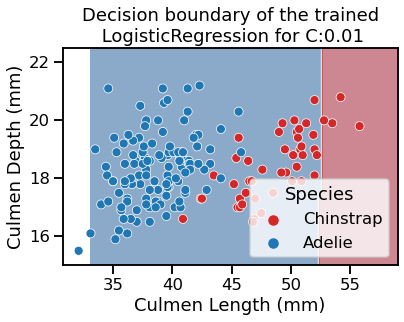

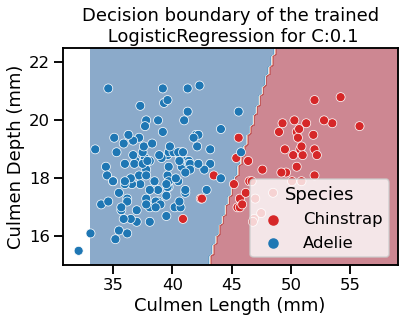

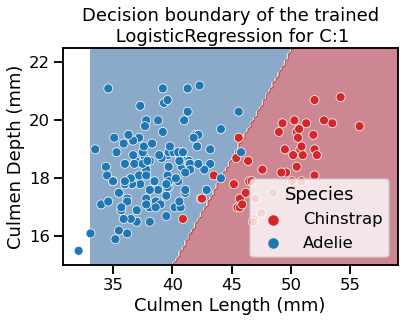

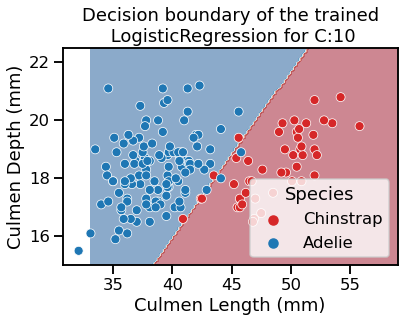

In [56]:
from helpers.plotting import DecisionBoundaryDisplay
import seaborn as sns
import matplotlib.pyplot as plt

Cs = [0.01, 0.1, 1, 10]
coefs = []
for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    logistic_regression.fit(data_train, target_train)
    coefs.append(logistic_regression.named_steps['logisticregression'].coef_)
    DecisionBoundaryDisplay.from_estimator(
    logistic_regression, data_test, response_method="predict", cmap="RdBu_r", alpha=0.5
)
    sns.scatterplot(x=data_train.iloc[:,0], y=data_train.iloc[:,1],
    hue=target_train, palette=["tab:red", "tab:blue"])
    _ = plt.title(f"Decision boundary of the trained\n LogisticRegression for C:{C}")


Look at the impact of the `C` hyperparameter on the magnitude of the weights.

In [ ]:
df = pd.DataFrame(dict(zip(Cs, [coef.flatten() for coef in coefs])))
df.index = ['CulmenLength', 'CulmenDepth']

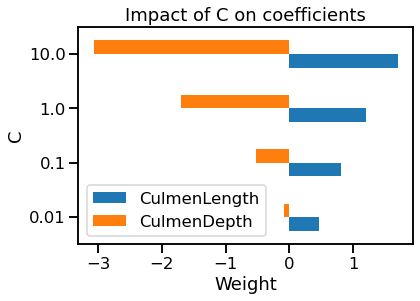

In [ ]:
df.T.plot.barh()
_=plt.title("Impact of C on coefficients")
_= plt.ylabel("C")
_= plt.xlabel("Weight")

As C descreases more regularisation is added to the model and so the weights tend towards 0 - this can be seen visually above where the decision boundary is parallel to the X axis 